<center style="font-size: 26px"> <b>Задания Python</b></center>

In [14]:
# обеспечиваем совместимость с Python 2 и 3
from __future__ import (absolute_import, division, print_function, unicode_literals)

# отключаем предупреждения дистрибутива Anaconda
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import requests
from datetime import datetime
import matplotlib.pyplot as plt

**Описание датасета:**   
[Датасет вакансий с платформы HH.ru на Kaggle.com](https://www.kaggle.com/datasets/pavfedotov/heaadhunter-vacancies?resource=download&select=df2021-08-03.csv) 

Нужный файл - df2021-08-03.csv.

- *vacancy* - наименование вакансии
- *url* - ссылка на вакансию
- *created* - дата и время создания
- *has_test* - наличие тестового задания в вакансии
- *salary_from* - нижняя граница значения заработной платы
- *salary_to* - верхняя граница значения заработной платы
- *currency* - валюта заработной платы
- *experience* - требуемый опыт
- *schedule* - тип рабочего графика
- *skills* - требуемые навыки
- *employer* - наименование работодателя
- *area* - наименование города
- *description* - описание вакансии

#### Загрузите датасет

In [139]:
df = pd.read_csv('df2021-08-03.csv')
df.head()

,vacancy,url,created,has_test,salary_from,salary_to,currency,experience,schedule,skills,employer,area,description
0,Backend/Full-stack developer (python),https://hh.ru/applicant/vacancy_response?vacan...,2021-08-01T13:02:48+0300,False,120000.0,NaN,RUR,От 1 года до 3 лет,Гибкий график,Python;PostgreSQL;Linux;Flask;,ATI.SU,Санкт-Петербург,Привет! Мы ATI.SU ― крупнейшая в России компан...
1,Бэкенд-разработчик (Python) / Middle Python / ...,https://hh.ru/applicant/vacancy_response?vacan...,2021-07-09T08:13:01+0300,False,150000.0,220000.0,RUR,От 3 до 6 лет,Удаленная работа,Python;Git;MongoDB;Redis;Design Patterns;Flask;,"ЮТэйр, Авиакомпания",Киров (Кировская область),Utair - российская авиакомпания. Мы летаем по ...
2,Fullstack Middle Python (Django) / VueJS Dev,https://hh.ru/applicant/vacancy_response?vacan...,2021-07-21T15:24:16+0300,False,NaN,NaN,NaN,От 1 года до 3 лет,Полный день,Python;Git;Django Framework;PostgreSQL;Linux;V...,КРОК,Москва,"В команду, которая занимается разработкой инст..."
3,Python Developer,https://hh.ru/applicant/vacancy_response?vacan...,2021-07-28T12:57:57+0300,False,NaN,NaN,NaN,От 3 до 6 лет,Удаленная работа,Python;Django Framework;CSS;,Mad Devs,Краснодар,Mad Devs - full stack команда для разработки и...
4,QA Automation (Python),https://hh.ru/applicant/vacancy_response?vacan...,2021-07-31T17:10:49+0300,False,NaN,NaN,NaN,От 1 года до 3 лет,Удаленная работа,Python;Pytest;Ansible;Selenium;,Аренадата Софтвер,Москва,"Arenadata — динамично развивающаяся компания, ..."


### Практические задания:

#### 1. Изучите методы для сбора данных курсов валют в [API Центрального банка Российской Федерации](https://www.cbr.ru/development/SXML/) . Используя запросы к API, приведите значения заработной платы к рублям одним из вариантов:  на текущую дату  либо на дату создания (created).

In [190]:
# URL для запроса к API Центробанка (на момент запроса)
url = 'https://www.cbr.ru/scripts/XML_daily.asp'

#(1 вариант)
# Получение курса рубля на дату запроса 
response = requests.get(url)
xml = response.content.decode('windows-1251')
usd = float(xml.split('<Value>')[14].split('</Value>')[0].replace(',', '.'))
eur = float(xml.split('<Value>')[15].split('</Value>')[0].replace(',', '.'))

# помимо рублей в таблице присутвуют доллары и евро, расчитаем заработную плату для каждой валюты
def convert_salary(row):
    if row['currency'] == 'USD':
        row['salary_from'] *= usd
        row['salary_to'] *= usd
    elif row['currency'] == 'EUR':
        row['salary_from'] *= eur
        row['salary_to'] *= eur
    return row

df = df.apply(convert_salary, axis=1)
df.head()


,vacancy,url,created,has_test,salary_from,salary_to,currency,experience,schedule,skills,employer,area,description,salary
0,Backend/Full-stack developer (python),https://hh.ru/applicant/vacancy_response?vacan...,2021-08-01 13:02:48+03:00,False,120000.0,NaN,RUR,От 1 года до 3 лет,Гибкий график,Python;PostgreSQL;Linux;Flask;,ATI.SU,Санкт-Петербург,Привет! Мы ATI.SU ― крупнейшая в России компан...,120000.0
1,Бэкенд-разработчик (Python) / Middle Python / ...,https://hh.ru/applicant/vacancy_response?vacan...,2021-07-09 08:13:01+03:00,False,150000.0,220000.0,RUR,От 3 до 6 лет,Удаленная работа,Python;Git;MongoDB;Redis;Design Patterns;Flask;,"ЮТэйр, Авиакомпания",Киров (Кировская область),Utair - российская авиакомпания. Мы летаем по ...,185000.0
2,Fullstack Middle Python (Django) / VueJS Dev,https://hh.ru/applicant/vacancy_response?vacan...,2021-07-21 15:24:16+03:00,False,NaN,NaN,NaN,От 1 года до 3 лет,Полный день,Python;Git;Django Framework;PostgreSQL;Linux;V...,КРОК,Москва,"В команду, которая занимается разработкой инст...",NaN
3,Python Developer,https://hh.ru/applicant/vacancy_response?vacan...,2021-07-28 12:57:57+03:00,False,NaN,NaN,NaN,От 3 до 6 лет,Удаленная работа,Python;Django Framework;CSS;,Mad Devs,Краснодар,Mad Devs - full stack команда для разработки и...,NaN
4,QA Automation (Python),https://hh.ru/applicant/vacancy_response?vacan...,2021-07-31 17:10:49+03:00,False,NaN,NaN,NaN,От 1 года до 3 лет,Удаленная работа,Python;Pytest;Ansible;Selenium;,Аренадата Софтвер,Москва,"Arenadata — динамично развивающаяся компания, ...",NaN


#### 2. Найдите вакансию с самой высокой заработной платой, где подойдет 4 года опыта работы и не нужно проходить тестовое задание.

In [166]:
# посмотрим на требования к опыту
unique_values = df['experience'].unique()
# 'От 1 года до 3 лет', 'От 3 до 6 лет', 'Нет опыта', 'Более 6 лет' - нам подходит только 2й вариант

# фильтрация вакансий по условиям 
filtered_df = df[(df['experience'] == 'От 3 до 6 лет') & (df['has_test'] == False)]

# Ищем вакансию с самой большой начальной з/п
max_salary_vacancy_f = filtered_df.loc[filtered_df['salary_from'].idxmax()].to_frame()
print(max_salary_vacancy_f)

# Ищем вакансию с самой большим потолком з/п
max_salary_vacancy_t = filtered_df.loc[filtered_df['salary_to'].idxmax()].to_frame()
print(max_salary_vacancy_t)


                                                           565
vacancy              Senior C++/Python Developer (Yellow Team)
url          https://hh.ru/applicant/vacancy_response?vacan...
created                              2021-07-29 19:01:14+03:00
has_test                                                 False
salary_from                                             350000
salary_to                                                  NaN
currency                                                   RUR
experience                                       От 3 до 6 лет
schedule                                           Полный день
skills                                                     NaN
employer                                               Semrush
area                                           Санкт-Петербург
description  Semrush – продуктовая IT-компания. С 2008 года...
salary                                                  350000
                                                       

#### 3. Сделайте рейтинг (топ-30) навыков по всем вакансиям.

In [130]:
# считаем, сколько раз каждый навык упоминался суммарно во всех объявлениях
skills_dict = {}
for skills in df['skills']:
    if pd.isna(skills):
        continue
    for skill in skills.split(';'):
        if skill.strip() in skills_dict:
            skills_dict[skill.strip()] += 1
        else:
            skills_dict[skill.strip()] = 1
            
# выбираем топ-30            
skills_dict.pop('', None)            
top_skills = sorted(skills_dict.items(), key=lambda x: x[1], reverse=True)[:30]

for skill, count in top_skills:
    print(skill, count)

Python 1442
Git 586
SQL 501
PostgreSQL 499
Django Framework 467
Linux 463
Flask 177
Docker 172
JavaScript 149
Английский язык 141
MySQL 128
ООП 120
MongoDB 113
Redis 107
REST 70
RabbitMQ 68
Django 62
CSS 56
HTML 56
Atlassian Jira 52
C++ 50
API 49
MS SQL 43
Java 43
Базы данных 41
Работа в команде 39
AWS 36
Pytest 35
Celery 35
aiohttp 33


#### 4. Cоставьте топ городов с наибольшей средней заработной платой по вакансиям тестировщика (QA).

Для некоторых вакансий вместо зарплатной вилки указана только нижняя/верхняя граница зарплаты.
Будем считать, что если указана только верхняя или нижняя граница - то з/п равна этому значению, если обе - то их среднему
(это может быть не совсем правильным подходом, т.к. в таких случаях конкретному работнику зп оглашается после собеседования, и
нужна дополнительная информация о том, как эту разницу в данном случае корректно учесть). Создадим столбик salary, который потребуется для расчета среднего

In [191]:
df['salary'] = df[['salary_from', 'salary_to']].mean(axis=1, skipna=True)

qa = df[df['vacancy'].str.contains('QA')]
sal_mean_by_area = qa.groupby('area')['salary'].mean().sort_values(ascending=False)
sal_mean_by_area

area
Тамбов             200000.000000
Москва             190555.555556
Санкт-Петербург    180555.555556
Казань              90000.000000
Новосибирск                  NaN
Самара                       NaN
Саратов                      NaN
Name: salary, dtype: float64

В части городов для всех нужных вакансий з/п не указана, поэтому рассчитать среднюю не представляется возможным

#### 5. Покажите динамику количества вакансии по месяцам даты создания.

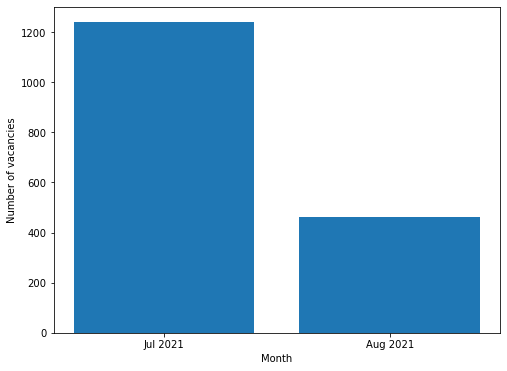

In [153]:
df['created'] = pd.to_datetime(df['created'])  

# считаем кол-во вакансий по месяцам (в датасете всего два месяца)
df_m = df.groupby(pd.Grouper(key='created', freq='M')).size().reset_index(name='count') 
df_m['created'] = df_m['created'].apply(lambda x: datetime.strftime(x, '%b %Y'))

# строим график
plt.figure(figsize=(8, 6)) 
plt.bar(df_m['created'], df_m['count'])
plt.xlabel('Month')
plt.ylabel('Number of vacancies')
plt.show()

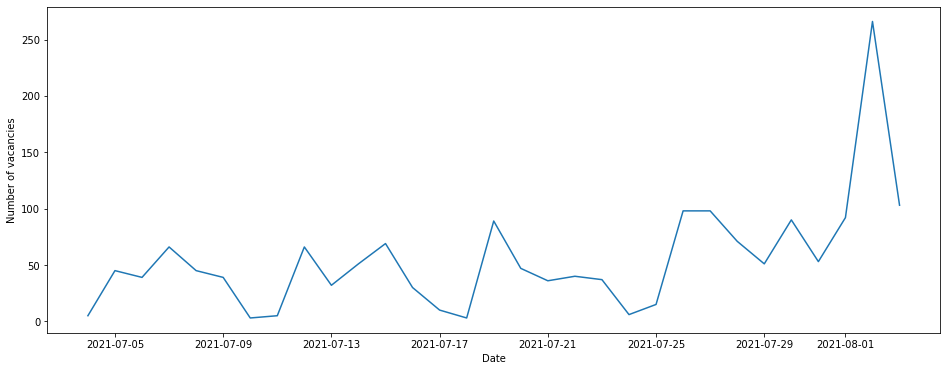

In [154]:
# в данных указаны вакансии всего за 2 месяца, поэтому, наверное, интереснее посмотреть на динамику по дням
df_d = df.groupby(pd.Grouper(key='created', freq='D')).size().reset_index(name='count') 

plt.figure(figsize=(16, 6)) 
plt.plot(df_d['created'], df_d['count'])  # строим график
plt.xlabel('Date')
plt.ylabel('Number of vacancies')
plt.show()

#### 6. Напишите функцию для поиска вакансий по переданным в нее значениям заработной платы, наличия тестового задания, наличия заданного текста в наименовании вакансии, наличия заданного навыка. В результате выведите количество найденных вакансий, среднюю заработную плату по найденным вакансиям и список ссылок найденных вакансий. 

In [ ]:
def find_vacancies(data, salary_min=None, has_test=False, keyword=None, skill=None):
    # Фильтруем вакансии по заданным параметрам
    if salary_min is not None:
        data = data[data['salary_from'] >= salary_min]
        #предполагаем, что пользователь укаазывает минимальную з/п, которую хочет гарантированно получать
        #в некоторых вакансиях не указана нижняя граница, поэтому они не будут появлятся при заполнении этого поля
    if has_test:
        data = data[data['has_test'] == True]
    if keyword is not None:
        data = data[data['vacancy'].str.contains(keyword, case=False)]
    if skill is not None:
        data = data[data['skills'].str.contains(skill, case=False)]
    
    # Выводим результаты поиска
    count = len(data)
    avg_salary = data['salary'].mean()
    links = data['url'].tolist()
    
    print('Found', count, 'vacancies')
    print('Average salary:', avg_salary)
    print('Links:')
    for link in links:
        print(link)

In [192]:
#пример        
find_vacancies(df, salary_min=50000, has_test=True, keyword='developer', skill='Git')

Found 2 vacancies
Average salary: 212500.0
Links:
https://hh.ru/applicant/vacancy_response?vacancyId=46660773
https://hh.ru/applicant/vacancy_response?vacancyId=46085687
